# 음주, 흡연량과 각종 질병과의 상관관계

## 암, 고혈압, 골다공증, 우울증

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3
df = pd.read_csv('hn18.csv', encoding = 'cp949', low_memory=False)

# 필요한 column만 추출

In [2]:
df2 = df[['sex', 'age', 'DI1_pr', 'DM4_pr', 'DJ2_pr', 'DE1_pr', 'DE2_pr', 'DC1_pr', 'DC2_pr', 'DC3_pr', 'DC4_pr',
           'DC5_pr', 'DC6_pr', 'DC7_pr', 'DF2_pr', 'BD2_1', 'BS1_1', 'BS3_2', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI']]

In [3]:
data = df2.rename({'sex':'성별', 'age':'나이', 'DI1_pr':'고혈압유병', 'DM4_pr':'골다공증', 
             'DJ2_pr':'폐결핵', 'DE1_pr':'당뇨병', 'DE2_pr':'갑상선질환', 'DC1_pr':'위암', 'DC2_pr':'간암', 'DC3_pr':'대장암', 
             'DC4_pr':'유방암', 'DC5_pr':'자궁경부암', 'DC6_pr':'폐암', 'DC7_pr':'갑상선암', 'DF2_pr':'우울증', 'BD2_1':'1회음주량(잔)', 
             'BS1_1':'평생흡연여부', 'BS3_2':'하루평균흡연량', 'HE_ht':'키', 'HE_wt':'몸무게', 'HE_wc':'허리둘레',
             'HE_BMI':'BMI'}, axis = 'columns')

### 나이대, 비만도 열 추가

In [4]:
age_group = [0, 20, 30, 40, 50, 60, 70, 80, 90]

age_group_cut_data = pd.cut(data.성별, age_group)


group_names = ['미성년자', '20대', '30대', '40대', '50대', '60대', '70대', '80대']
age_group_data = pd.cut(data.나이, age_group, labels = group_names, right = False)
data['나이대'] = age_group_data

obesity = [0, 18.5, 25, 100]
data['비만도'] = pd.cut(data.BMI, obesity, labels = ['저체중', '정상', '비만'], right = False)

data

,성별,나이,고혈압유병,골다공증,폐결핵,당뇨병,갑상선질환,위암,간암,대장암,...,우울증,1회음주량(잔),평생흡연여부,하루평균흡연량,키,몸무게,허리둘레,BMI,나이대,비만도
0,1,80,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,1.0,2.0,888.0,162.4,56.0,82.2,21.233226,80대,정상
1,1,78,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,2.0,3.0,888.0,167.7,76.4,98.3,27.166096,70대,비만
2,2,75,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,3.0,888.0,157.7,53.2,80.7,21.391845,70대,정상
3,2,43,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,2.0,3.0,888.0,151.0,53.5,79.7,23.463883,40대,정상
4,2,80,8.0,8.0,8.0,1.0,8.0,8.0,8.0,8.0,...,8.0,8.0,3.0,888.0,146.1,57.6,93.0,26.984977,80대,비만
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,2,73,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,3.0,888.0,145.2,51.8,77.2,24.569512,70대,정상
7988,1,43,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,0.0,5.0,2.0,20.0,176.8,84.1,99.2,26.904906,40대,비만
7989,2,39,8.0,9.0,9.0,8.0,9.0,9.0,9.0,9.0,...,9.0,3.0,3.0,888.0,163.1,59.5,81.2,22.367067,30대,정상
7990,1,10,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,888.0,141.4,35.3,63.0,17.655332,미성년자,저체중


### 객관식 번호로 입력된 설문 결과를 유효값(해당됨, 해당안됨)으로 변경

In [5]:
#성별변환
sex2 = [0, 1.5, 2.5]
data['성별'] = pd.cut(data.성별, sex2, labels = ['남성', '여성'], right = False)

#고혈압유병
bp = [0, 0.5, 1.5, 9.5, 10]
data['고혈압유병'] = pd.cut(data.고혈압유병, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#골다공증
data['골다공증'] = pd.cut(data.골다공증, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#폐결핵
data['폐결핵'] = pd.cut(data.폐결핵, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#당뇨병
data['당뇨병'] = pd.cut(data.당뇨병, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#감상선질환
data['갑상선질환'] = pd.cut(data.갑상선질환, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#위암
data['위암'] = pd.cut(data.위암, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#간암
data['간암'] = pd.cut(data.간암, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#대장암
data['대장암'] = pd.cut(data.대장암, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#유방암
data['유방암'] = pd.cut(data.유방암, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#자궁경부암
data['자궁경부암'] = pd.cut(data.자궁경부암, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#폐암
data['폐암'] = pd.cut(data.폐암, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#갑상선암
data['갑상선암'] = pd.cut(data.갑상선암, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#우울증
data['우울증'] = pd.cut(data.우울증, bp, labels = ['있음', '없음', '해당없음', '무응답'], right = False)

#평생흡연여부
cg = [0, 1.5, 2.5, 3.5, 8.5, 9.5]
data['평생흡연여부'] = pd.cut(data.평생흡연여부, cg, labels = ['5갑미만', '5갑이상', '비흡연자', '해당없음', '무응답'], right = False)

#BMI


#data['1일 흡연량'] = ['무응답' if b == 999 & '해당없음' if b == 888 for b in data['하루평균흡연량']]

#하루평균흡연량
data[['하루평균흡연량']] = data[['하루평균흡연량']].replace(888, 0)
data[['하루평균흡연량']] = data[['하루평균흡연량']].replace(999, 0)

# 1.흡연의 영향

### 성별별 흡연 여부(교차표, 막대그래프)

In [6]:
pd.crosstab(index = [data['평생흡연여부']], columns = data['성별'])

성별,남성,여성
평생흡연여부,,
5갑미만,72,56
5갑이상,2001,360
비흡연자,641,3054
해당없음,719,686
무응답,20,31


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

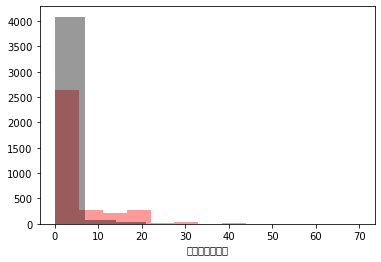

In [7]:
length_a = data.query('성별 == "남성"')["하루평균흡연량"]
length_b = data.query('성별 == "여성"')["하루평균흡연량"]


sns.distplot(length_a, bins = 10,
             color = 'red', kde = False)
sns.distplot(length_b, bins = 10,
             color = 'black', kde = False)

남성>여성

### 폐암과 흡연 - 생각보다 수가 적다 (해당없음이 대다수)

In [8]:
pd.crosstab(index = [data['평생흡연여부'], data['성별']], columns = data['폐암'])

폐암         있음  없음  해당없음
평생흡연여부 성별              
5갑미만   남성   0   0    72
       여성   0   0    56
5갑이상   남성   3   5  1993
       여성   1   0   359
비흡연자   남성   0   1   640
       여성   0   1  3053
해당없음   남성   0   0   719
       여성   0   0   686
무응답    남성   0   0    20
       여성   0   0    31

#### 해당없음이 대다수 -> 대다수의 사람이 폐암 검진을 받지 않았다 -> 관련검진을 해본 사람의 결과만 필요

#### 건강검진, 암검진여부 열 추가+원래 표에 결합

In [9]:
df3 = df[['BH1', 'BH2_61']]
df3_rn = df3.rename({'BH1' : '건강검진여부', 'BH2_61':'암검진여부'}, axis = 'columns')
df3_rn['건강검진여부'] = pd.cut(df3_rn.건강검진여부, bp, labels = ['받음', '받지않음', '해당없음', '무응답'], right = False)
df3_rn['암검진여부'] = pd.cut(df3_rn.암검진여부, bp, labels = ['받음', '받지않음', '해당없음', '무응답'], right = False)
df3_rn

,건강검진여부,암검진여부
0,받지않음,받지않음
1,해당없음,해당없음
2,해당없음,해당없음
3,받지않음,해당없음
4,받지않음,받지않음
...,...,...
7987,해당없음,해당없음
7988,받지않음,받지않음
7989,해당없음,해당없음
7990,해당없음,해당없음


In [10]:
data['건강검진여부'] = df3_rn['건강검진여부']
data['암검진여부'] = df3_rn['암검진여부']
data

,성별,나이,고혈압유병,골다공증,폐결핵,당뇨병,갑상선질환,위암,간암,대장암,...,평생흡연여부,하루평균흡연량,키,몸무게,허리둘레,BMI,나이대,비만도,건강검진여부,암검진여부
0,남성,80,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,5갑이상,0.0,162.4,56.0,82.2,21.233226,80대,정상,받지않음,받지않음
1,남성,78,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,비흡연자,0.0,167.7,76.4,98.3,27.166096,70대,비만,해당없음,해당없음
2,여성,75,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,비흡연자,0.0,157.7,53.2,80.7,21.391845,70대,정상,해당없음,해당없음
3,여성,43,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,비흡연자,0.0,151.0,53.5,79.7,23.463883,40대,정상,받지않음,해당없음
4,여성,80,해당없음,해당없음,해당없음,없음,해당없음,해당없음,해당없음,해당없음,...,비흡연자,0.0,146.1,57.6,93.0,26.984977,80대,비만,받지않음,받지않음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,여성,73,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,비흡연자,0.0,145.2,51.8,77.2,24.569512,70대,정상,해당없음,해당없음
7988,남성,43,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,5갑이상,20.0,176.8,84.1,99.2,26.904906,40대,비만,받지않음,받지않음
7989,여성,39,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,비흡연자,0.0,163.1,59.5,81.2,22.367067,30대,정상,해당없음,해당없음
7990,남성,10,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,해당없음,0.0,141.4,35.3,63.0,17.655332,미성년자,저체중,해당없음,해당없음


In [11]:
pd.crosstab(index = [data['폐암']], columns = data['건강검진여부'])

건강검진여부,받지않음,해당없음
폐암,,
있음,3,1
없음,5,2
해당없음,4181,3448


#### OMG

In [12]:
data['건강검진여부'].value_counts()

받지않음    4189
해당없음    3451
무응답        0
받음         0
Name: 건강검진여부, dtype: int64

In [13]:
data['암검진여부'].value_counts()

해당없음    4040
받지않음    3600
무응답        0
받음         0
Name: 암검진여부, dtype: int64

### 암, 건강검진여부에서 받은사람이 0

In [14]:
pd.crosstab(index = [data['폐암']], columns = data['암검진여부'])

암검진여부,받지않음,해당없음
폐암,,
있음,3,1
없음,5,2
해당없음,3592,4037


In [15]:
pd.crosstab(index = [data['평생흡연여부']], columns = data['폐암'])

폐암,있음,없음,해당없음
평생흡연여부,,,
5갑미만,0,0,128
5갑이상,4,5,2352
비흡연자,0,2,3693
해당없음,0,0,1405
무응답,0,0,51


(예상대로) : 암에 관한 분석은 힘들것 같다

## 흡연과 폐기능의 상관관계?

노력성 호기량을 바탕으로 상관관계 분석

In [16]:
dff = df[['HE_fev1']]
dff_rn = dff.rename({'HE_fev1' : '노력성호기량'}, axis = 'columns')

data['노력성호기량'] = dff_rn['노력성호기량']
data

,성별,나이,고혈압유병,골다공증,폐결핵,당뇨병,갑상선질환,위암,간암,대장암,...,하루평균흡연량,키,몸무게,허리둘레,BMI,나이대,비만도,건강검진여부,암검진여부,노력성호기량
0,남성,80,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,0.0,162.4,56.0,82.2,21.233226,80대,정상,받지않음,받지않음,NaN
1,남성,78,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,0.0,167.7,76.4,98.3,27.166096,70대,비만,해당없음,해당없음,2.29
2,여성,75,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,0.0,157.7,53.2,80.7,21.391845,70대,정상,해당없음,해당없음,1.51
3,여성,43,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,0.0,151.0,53.5,79.7,23.463883,40대,정상,받지않음,해당없음,2.70
4,여성,80,해당없음,해당없음,해당없음,없음,해당없음,해당없음,해당없음,해당없음,...,0.0,146.1,57.6,93.0,26.984977,80대,비만,받지않음,받지않음,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,여성,73,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,0.0,145.2,51.8,77.2,24.569512,70대,정상,해당없음,해당없음,1.66
7988,남성,43,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,20.0,176.8,84.1,99.2,26.904906,40대,비만,받지않음,받지않음,3.27
7989,여성,39,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,0.0,163.1,59.5,81.2,22.367067,30대,정상,해당없음,해당없음,NaN
7990,남성,10,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,0.0,141.4,35.3,63.0,17.655332,미성년자,저체중,해당없음,해당없음,NaN


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

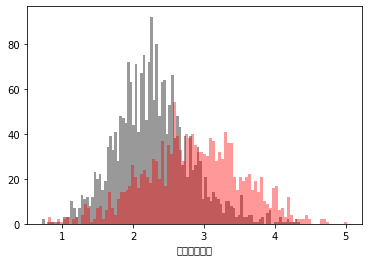

In [17]:
length_a = data.query('평생흡연여부 == "비흡연자"')["노력성호기량"]
length_b = data.query('평생흡연여부 == "5갑이상"')["노력성호기량"]


sns.distplot(length_a, bins = 100, 
             color = 'black', kde = False)
sns.distplot(length_b, bins = 100, 
             color = 'red', kde = False)

[0.24411231817334716, 4.242405303205382e-52]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

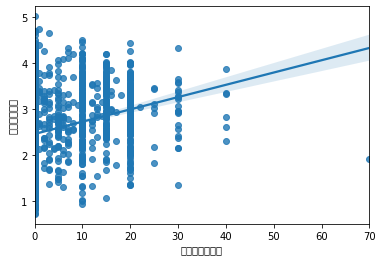

In [18]:
dataa = data.dropna()
sns.regplot(data = dataa, x = '하루평균흡연량', y = '노력성호기량')
[R, p] = stats.pearsonr(dataa['하루평균흡연량'], dataa['노력성호기량'])
print([R, p])

In [19]:
stats.chi2_contingency(pd.crosstab(dataa.하루평균흡연량, dataa.노력성호기량))

(9824.596970310358,
 2.0482186412489632e-41,
 8004,
 array([[8.291e-01, 8.291e-01, 8.291e-01, ..., 8.291e-01, 8.291e-01,
         8.291e-01],
        [3.993e-03, 3.993e-03, 3.993e-03, ..., 3.993e-03, 3.993e-03,
         3.993e-03],
        [5.323e-03, 5.323e-03, 5.323e-03, ..., 5.323e-03, 5.323e-03,
         5.323e-03],
        ...,
        [5.590e-03, 5.590e-03, 5.590e-03, ..., 5.590e-03, 5.590e-03,
         5.590e-03],
        [1.597e-03, 1.597e-03, 1.597e-03, ..., 1.597e-03, 1.597e-03,
         1.597e-03],
        [2.662e-04, 2.662e-04, 2.662e-04, ..., 2.662e-04, 2.662e-04,
         2.662e-04]]))

p=1.0628611687139912e-50(매우작은값)+카이제곱검정=우연에 의한 차이가 아니다!

## 흡연량과 혈압의 관계?

고혈압 분석을 위해 연속된 숫자로 된 수축,이완기혈압 컬럼 추가

In [20]:
df4 = df[['HE_sbp', 'HE_dbp']]
df4_rn = df4.rename({'HE_sbp' : '수축기혈압', 'HE_dbp':'이완기혈압'}, axis = 'columns')
df4_rn2 = df4_rn.dropna()

In [21]:
data['수축기혈압'] = df4_rn2['수축기혈압']
data['이완기혈압'] = df4_rn2['이완기혈압']
data

,성별,나이,고혈압유병,골다공증,폐결핵,당뇨병,갑상선질환,위암,간암,대장암,...,몸무게,허리둘레,BMI,나이대,비만도,건강검진여부,암검진여부,노력성호기량,수축기혈압,이완기혈압
0,남성,80,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,56.0,82.2,21.233226,80대,정상,받지않음,받지않음,NaN,150.0,84.0
1,남성,78,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,76.4,98.3,27.166096,70대,비만,해당없음,해당없음,2.29,132.0,77.0
2,여성,75,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,53.2,80.7,21.391845,70대,정상,해당없음,해당없음,1.51,156.0,73.0
3,여성,43,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,53.5,79.7,23.463883,40대,정상,받지않음,해당없음,2.70,102.0,70.0
4,여성,80,해당없음,해당없음,해당없음,없음,해당없음,해당없음,해당없음,해당없음,...,57.6,93.0,26.984977,80대,비만,받지않음,받지않음,1.80,149.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,여성,73,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,51.8,77.2,24.569512,70대,정상,해당없음,해당없음,1.66,136.0,82.0
7988,남성,43,없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,84.1,99.2,26.904906,40대,비만,받지않음,받지않음,3.27,122.0,99.0
7989,여성,39,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,59.5,81.2,22.367067,30대,정상,해당없음,해당없음,NaN,130.0,76.0
7990,남성,10,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,...,35.3,63.0,17.655332,미성년자,저체중,해당없음,해당없음,NaN,105.0,70.0


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\

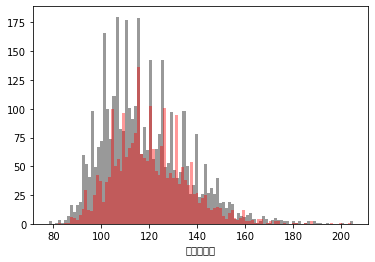

In [22]:
length_a = data.query('평생흡연여부 == "비흡연자"')["수축기혈압"]
length_b = data.query('평생흡연여부 == "5갑이상"')["수축기혈압"]


sns.distplot(length_a, bins = 100, 
             color = 'black', kde = False)
sns.distplot(length_b, bins = 100, 
             color = 'red', kde = False)

In [23]:
stats.chi2_contingency(pd.crosstab(dataa.하루평균흡연량, data.수축기혈압))

(1765.1325219208898,
 1.0,
 2438,
 array([[8.291e-01, 8.291e-01, 1.658e+00, ..., 8.291e-01, 8.291e-01,
         8.291e-01],
        [4.000e-03, 4.000e-03, 8.000e-03, ..., 4.000e-03, 4.000e-03,
         4.000e-03],
        [5.333e-03, 5.333e-03, 1.067e-02, ..., 5.333e-03, 5.333e-03,
         5.333e-03],
        ...,
        [5.600e-03, 5.600e-03, 1.120e-02, ..., 5.600e-03, 5.600e-03,
         5.600e-03],
        [1.600e-03, 1.600e-03, 3.200e-03, ..., 1.600e-03, 1.600e-03,
         1.600e-03],
        [2.667e-04, 2.667e-04, 5.333e-04, ..., 2.667e-04, 2.667e-04,
         2.667e-04]]))

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50756 missing from current font.
  font.set_text(s, 0, flags=flags)


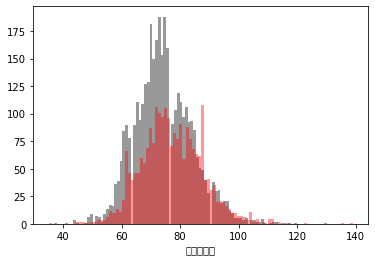

In [24]:
length_a = data.query('평생흡연여부 == "비흡연자"')["이완기혈압"]
length_b = data.query('평생흡연여부 == "5갑이상"')["이완기혈압"]


sns.distplot(length_a, bins = 100, 
             color = 'black', kde = False)
sns.distplot(length_b, bins = 100, 
             color = 'red', kde = False)

In [25]:
stats.chi2_contingency(pd.crosstab(dataa.하루평균흡연량, data.이완기혈압))

(1427.593280142943,
 0.9995700293642894,
 1610,
 array([[8.291e-01, 8.291e-01, 1.658e+00, ..., 8.291e-01, 8.291e-01,
         8.291e-01],
        [4.000e-03, 4.000e-03, 8.000e-03, ..., 4.000e-03, 4.000e-03,
         4.000e-03],
        [5.333e-03, 5.333e-03, 1.067e-02, ..., 5.333e-03, 5.333e-03,
         5.333e-03],
        ...,
        [5.600e-03, 5.600e-03, 1.120e-02, ..., 5.600e-03, 5.600e-03,
         5.600e-03],
        [1.600e-03, 1.600e-03, 3.200e-03, ..., 1.600e-03, 1.600e-03,
         1.600e-03],
        [2.667e-04, 2.667e-04, 5.333e-04, ..., 2.667e-04, 2.667e-04,
         2.667e-04]]))

카이제곱검정 결과 이완, 수축기 혈압과 흡연량은 유의미한 상관관계가 없는것으로 판정

### +비만도와 폐기능의 상관관계?

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\

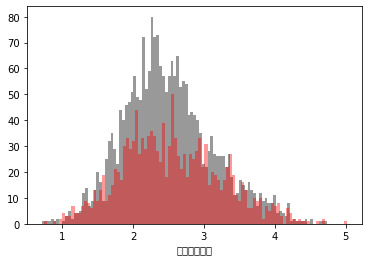

In [26]:
length_a = data.query('비만도 == "정상"')["노력성호기량"]
length_b = data.query('비만도 == "비만"')["노력성호기량"]


sns.distplot(length_a, bins = 100, 
             color = 'black', kde = False)
sns.distplot(length_b, bins = 100, 
             color = 'red', kde = False)

In [27]:
stats.chi2_contingency(pd.crosstab(dataa.비만도, dataa.노력성호기량))

(773.4227053183702,
 0.021663355478938315,
 696,
 array([[0.017, 0.017, 0.017, ..., 0.017, 0.017, 0.017],
        [0.619, 0.619, 0.619, ..., 0.619, 0.619, 0.619],
        [0.364, 0.364, 0.364, ..., 0.364, 0.364, 0.364]]))

[0.03615197837520071, 0.02684026316715392]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

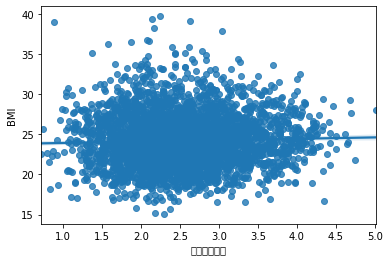

In [28]:
dataa = data.dropna()
sns.regplot(data = dataa, x = '노력성호기량', y = 'BMI')
[R, p] = stats.pearsonr(dataa['노력성호기량'], dataa['BMI'])
print([R, p])

통계적으로 유의미한 차이가 난다(비만일수록 노력성호기량 저하)

### 흡연량과 우울증의 상관관계

In [29]:
pd.crosstab(index = [data['평생흡연여부']], columns = data['우울증'])

우울증,있음,없음,해당없음
평생흡연여부,,,
5갑미만,1,5,122
5갑이상,37,50,2274
비흡연자,80,102,3513
해당없음,0,0,1405
무응답,0,1,50


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

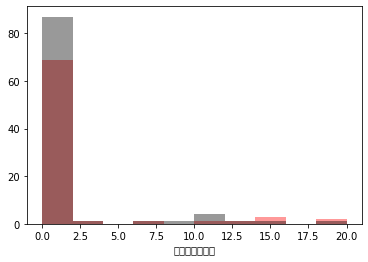

In [30]:
length_a = dataa.query('우울증 == "있음"')["하루평균흡연량"]
length_b = dataa.query('우울증 == "없음"')["하루평균흡연량"]


sns.distplot(length_a, bins = 10,
             color = 'red', kde = False)
sns.distplot(length_b, bins = 10,
             color = 'black', kde = False)

In [31]:
stats.chi2_contingency(pd.crosstab(dataa.하루평균흡연량, dataa.우울증))

(28.067174226296324,
 0.9828764051398917,
 46,
 array([[6.467e+01, 8.042e+01, 2.964e+03],
        [3.120e-01, 3.880e-01, 1.430e+01],
        [4.160e-01, 5.173e-01, 1.907e+01],
        [4.784e-01, 5.949e-01, 2.193e+01],
        [1.040e-01, 1.293e-01, 4.767e+00],
        [8.528e-01, 1.061e+00, 3.909e+01],
        [3.328e-01, 4.139e-01, 1.525e+01],
        [3.536e-01, 4.397e-01, 1.621e+01],
        [1.248e-01, 1.552e-01, 5.720e+00],
        [2.080e-02, 2.587e-02, 9.533e-01],
        [2.912e+00, 3.621e+00, 1.335e+02],
        [2.704e-01, 3.363e-01, 1.239e+01],
        [1.872e-01, 2.328e-01, 8.580e+00],
        [4.160e-02, 5.173e-02, 1.907e+00],
        [2.184e+00, 2.716e+00, 1.001e+02],
        [1.040e-01, 1.293e-01, 4.767e+00],
        [8.320e-02, 1.035e-01, 3.813e+00],
        [2.080e-02, 2.587e-02, 9.533e-01],
        [3.786e+00, 4.708e+00, 1.735e+02],
        [2.080e-02, 2.587e-02, 9.533e-01],
        [1.456e-01, 1.811e-01, 6.673e+00],
        [4.368e-01, 5.432e-01, 2.002e+01],
       

표본이 많지 않아서 명확한 결과는 나오지 않았지만 큰 관계는 없는것으로 보인다

### 흡연량과 골다공증의 상관관계

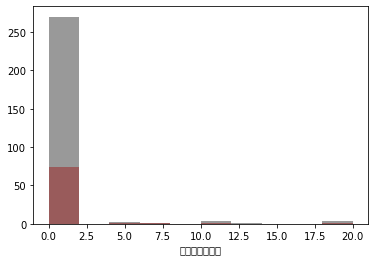

In [32]:
length_a = dataa.query('골다공증 == "있음"')["하루평균흡연량"]
length_b = dataa.query('골다공증 == "없음"')["하루평균흡연량"]


sns.distplot(length_a, bins = 10,
             color = 'red', kde = False)
sns.distplot(length_b, bins = 10,
             color = 'black', kde = False)

In [33]:
stats.chi2_contingency(pd.crosstab(dataa.하루평균흡연량, dataa.골다공증))

(55.49798725544217,
 0.15920650336018516,
 46,
 array([[6.467e+01, 2.321e+02, 2.812e+03],
        [3.120e-01, 1.120e+00, 1.357e+01],
        [4.160e-01, 1.493e+00, 1.809e+01],
        [4.784e-01, 1.717e+00, 2.080e+01],
        [1.040e-01, 3.733e-01, 4.523e+00],
        [8.528e-01, 3.061e+00, 3.709e+01],
        [3.328e-01, 1.195e+00, 1.447e+01],
        [3.536e-01, 1.269e+00, 1.538e+01],
        [1.248e-01, 4.480e-01, 5.427e+00],
        [2.080e-02, 7.467e-02, 9.045e-01],
        [2.912e+00, 1.045e+01, 1.266e+02],
        [2.704e-01, 9.707e-01, 1.176e+01],
        [1.872e-01, 6.720e-01, 8.141e+00],
        [4.160e-02, 1.493e-01, 1.809e+00],
        [2.184e+00, 7.840e+00, 9.498e+01],
        [1.040e-01, 3.733e-01, 4.523e+00],
        [8.320e-02, 2.987e-01, 3.618e+00],
        [2.080e-02, 7.467e-02, 9.045e-01],
        [3.786e+00, 1.359e+01, 1.646e+02],
        [2.080e-02, 7.467e-02, 9.045e-01],
        [1.456e-01, 5.227e-01, 6.332e+00],
        [4.368e-01, 1.568e+00, 1.900e+01],
       

표본이 부족하기는 하지만 비흡연자는 골다공증이 없는사람이 있는사람보다 약 4배 많다

카이제곱검정결과에 의하면 위 결과는 우연일 확률이 높다

# 2.음주의 영향

## 성별별 음주량(교차표, 막대그래프)

In [34]:
pd.crosstab(index = [data['1회음주량(잔)']], columns = data['성별'])

성별,남성,여성
1회음주량(잔),,
1.0,488,1217
2.0,466,527
3.0,377,254
4.0,512,182
5.0,450,136
8.0,1143,1841
9.0,17,30


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\

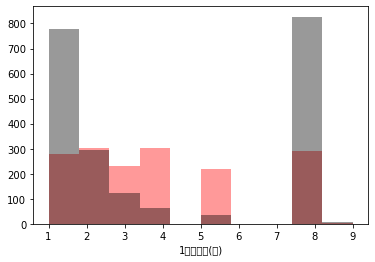

In [35]:
length_a = dataa.query('성별 == "남성"')["1회음주량(잔)"]
length_b = dataa.query('성별 == "여성"')["1회음주량(잔)"]


sns.distplot(length_a, bins = 10,
             color = 'red', kde = False)
sns.distplot(length_b, bins = 10,
             color = 'black', kde = False)

재미있는결과: 술을 아예 적게마시는 사람, 많이 마시는 사람은 남성보다 여성이 더 많다!

### 음주와 혈압의 상관관계?

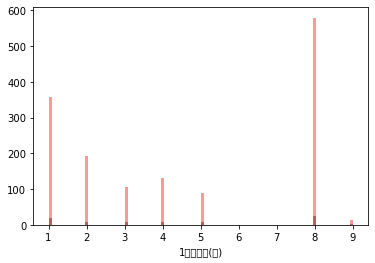

In [36]:
length_a = data.query('고혈압유병 == "있음"')["1회음주량(잔)"]
length_b = data.query('고혈압유병 == "없음"')["1회음주량(잔)"]


sns.distplot(length_a, bins = 100, 
             color = 'black', kde = False)
sns.distplot(length_b, bins = 100, 
             color = 'red', kde = False)

[0.09976156189379934, 9.219699798115237e-10]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

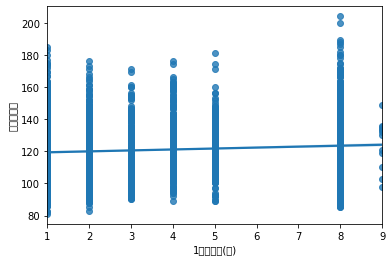

In [37]:
dataa = data.dropna()
sns.regplot(data = dataa, x = '1회음주량(잔)', y = '수축기혈압')
[R, p] = stats.pearsonr(dataa['1회음주량(잔)'], dataa['수축기혈압'])
print([R, p])

[-0.02635994885969984, 0.10653764693821914]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

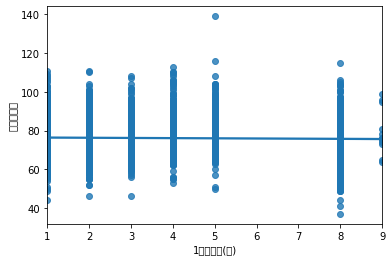

In [38]:
dataa = data.dropna()
sns.regplot(data = dataa, x = '1회음주량(잔)', y = '이완기혈압')
[R, p] = stats.pearsonr(dataa['1회음주량(잔)'], dataa['이완기혈압'])
print([R, p])

In [39]:
stats.chi2_contingency(pd.crosstab(data['1회음주량(잔)'], data.수축기혈압))

(801.1827671117317,
 0.005397186394562401,
 702,
 array([[2.484e-01, 2.484e-01, 2.484e-01, 2.484e-01, 2.484e-01, 7.452e-01,
         4.968e-01, 9.936e-01, 1.242e+00, 1.987e+00, 1.987e+00, 4.223e+00,
         4.471e+00, 5.961e+00, 7.203e+00, 1.143e+01, 1.540e+01, 1.987e+01,
         1.764e+01, 2.161e+01, 2.236e+01, 2.260e+01, 2.707e+01, 3.378e+01,
         3.080e+01, 3.353e+01, 4.272e+01, 4.049e+01, 4.993e+01, 4.645e+01,
         3.949e+01, 3.900e+01, 3.850e+01, 4.695e+01, 3.875e+01, 4.620e+01,
         4.595e+01, 5.191e+01, 5.092e+01, 4.074e+01, 3.453e+01, 3.701e+01,
         3.254e+01, 3.751e+01, 3.080e+01, 3.304e+01, 3.055e+01, 3.254e+01,
         3.701e+01, 3.328e+01, 2.285e+01, 2.360e+01, 2.335e+01, 2.434e+01,
         2.534e+01, 2.285e+01, 2.086e+01, 2.484e+01, 2.236e+01, 2.161e+01,
         1.316e+01, 1.565e+01, 1.515e+01, 1.813e+01, 1.093e+01, 1.242e+01,
         9.687e+00, 9.936e+00, 1.068e+01, 1.143e+01, 9.936e+00, 7.700e+00,
         6.707e+00, 7.949e+00, 7.203e+00, 4.471e+00

In [40]:
stats.chi2_contingency(pd.crosstab(data['1회음주량(잔)'], data.이완기혈압))

(947.6287106618788,
 1.1021219254725554e-28,
 510,
 array([[2.484e-01, 2.484e-01, 4.968e-01, 2.484e-01, 2.484e-01, 7.452e-01,
         9.936e-01, 9.936e-01, 1.987e+00, 1.490e+00, 1.242e+00, 1.242e+00,
         2.732e+00, 3.726e+00, 4.471e+00, 3.974e+00, 4.471e+00, 4.719e+00,
         9.191e+00, 1.093e+01, 9.191e+00, 1.615e+01, 1.813e+01, 2.385e+01,
         3.577e+01, 3.751e+01, 3.800e+01, 4.049e+01, 4.769e+01, 4.223e+01,
         4.819e+01, 5.415e+01, 5.589e+01, 7.650e+01, 6.061e+01, 7.675e+01,
         8.122e+01, 6.955e+01, 8.197e+01, 7.104e+01, 4.372e+01, 4.968e+01,
         5.440e+01, 5.216e+01, 4.074e+01, 5.067e+01, 4.446e+01, 4.198e+01,
         3.850e+01, 3.204e+01, 2.707e+01, 2.558e+01, 1.987e+01, 1.838e+01,
         1.739e+01, 1.664e+01, 1.366e+01, 1.043e+01, 1.118e+01, 9.439e+00,
         6.707e+00, 5.713e+00, 4.223e+00, 3.726e+00, 2.981e+00, 2.236e+00,
         2.236e+00, 3.477e+00, 1.242e+00, 1.490e+00, 4.968e-01, 1.490e+00,
         4.968e-01, 9.936e-01, 1.242e+00, 4.968e-

수축기혈압은 유의미, 이완기혈압은 우연?

### 음주량과 우울증의 상관관계?

In [41]:
pd.crosstab(index = [data['1회음주량(잔)']], columns = data['우울증'])

우울증,있음,없음,해당없음
1회음주량(잔),,,
1.0,43,41,1621
2.0,12,19,962
3.0,6,7,618
4.0,6,9,679
5.0,12,14,560
8.0,39,68,2877
9.0,0,0,47


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\

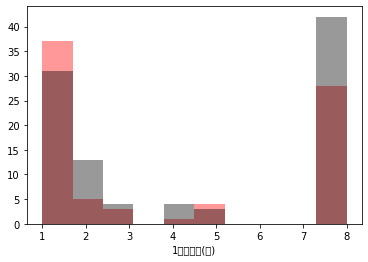

In [42]:
length_a = dataa.query('우울증 == "있음"')["1회음주량(잔)"]
length_b = dataa.query('우울증 == "없음"')["1회음주량(잔)"]


sns.distplot(length_a, bins = 10,
             color = 'red', kde = False)
sns.distplot(length_b, bins = 10,
             color = 'black', kde = False)

표본이 많지는 않으나 크게 상관관계가 있는것 같지는 않다

### 음주량과 골다공증의 상관관계?

In [43]:
pd.crosstab(index = [data['1회음주량(잔)']], columns = data['골다공증'])

골다공증,있음,없음,해당없음
1회음주량(잔),,,
1.0,33,121,1551
2.0,8,29,956
3.0,3,10,618
4.0,4,2,688
5.0,1,2,583
8.0,51,226,2707
9.0,0,1,46


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\

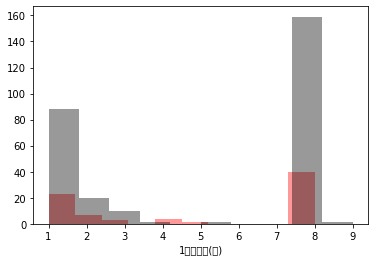

In [44]:
length_a = dataa.query('골다공증 == "있음"')["1회음주량(잔)"]
length_b = dataa.query('골다공증 == "없음"')["1회음주량(잔)"]


sns.distplot(length_a, bins = 10,
             color = 'red', kde = False)
sns.distplot(length_b, bins = 10,
             color = 'black', kde = False)

오히려 1회음주량이 높은사람중엔 골다공증이 없는 사람이 더 많다? :아마 1회음주량이 높은사람은 건강상태가 좋을것이므로 골다공증x

### 음주량과 비만도의 상관관계?

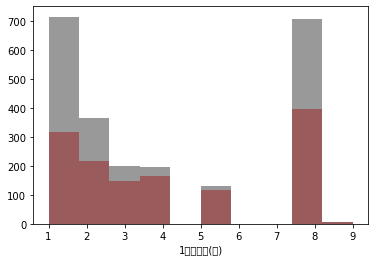

In [45]:
length_a = dataa.query('비만도 == "비만"')["1회음주량(잔)"]
length_b = dataa.query('비만도 == "정상"')["1회음주량(잔)"]


sns.distplot(length_a, bins = 10,
             color = 'red', kde = False)
sns.distplot(length_b, bins = 10,
             color = 'black', kde = False)

[0.040731850706831746, 0.012613121713622139]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\

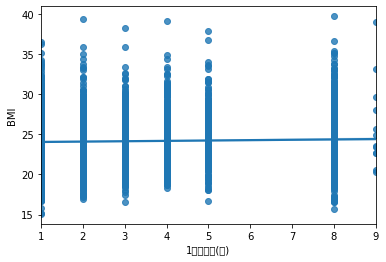

In [46]:
dataa = data.dropna()
sns.regplot(data = dataa, x = '1회음주량(잔)', y = 'BMI')
[R, p] = stats.pearsonr(dataa['1회음주량(잔)'], dataa['BMI'])
print([R, p])

## +c.f.)음주량과 흡연량의 상관관계?

[-0.014944447023922235, 0.36024269642144363]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

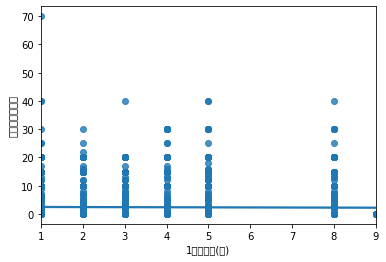

In [47]:
dataa = data.dropna()
sns.regplot(data = dataa, x = '1회음주량(잔)', y = '하루평균흡연량')
[R, p] = stats.pearsonr(dataa['1회음주량(잔)'], dataa['하루평균흡연량'])
print([R, p])

음주량과 흡연량관에 상관관계가 있다면 이는 우연에 의한 상관관계일 가능성이 높다.

# 결론

## 1. 성별별 흡연량 남>여, 성별별 음주여부 여>남
## 2. 흡연과 혈압:상관관계 x , 음주와 혈압 - 오류
## 3. 흡연, 음주와 골다공증, 우울증: 연관x
## 4. c.f) 흡연과 노력성 호기량, 비만도와 노력성 호기량은 상관관계를 가진다
## 5. c.f) 음주량과 비만도, 음주량과 흡연량은 상관관계x